In [95]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'database_votes.csv')
df_scrutin = pd.read_csv('database_scrutins.csv', index_col = 'idScrutin')
df_votants = pd.read_csv('database_votants.csv', index_col = 0)

## Modification de la colonne demandeur :

Cette colonne réunit les différents demandeurs et parfois coalition de demandeurs, ce qui rend moins facile l'étude des résultats des scrutins pour chaque demandeurs indépendamment des autres. Pour remédier à cela, et également cleaner la colonne demandeur (fautes de frappes, guillements), nous avons décidé de créer une colonne pour chaque demandeur. Grâce au One Hot Encoding, pour chaque scrutin ces colonnes prendront la valeur 1 ou 0 en fonction des demandeurs dudit scrutin.

In [104]:
groupes = ["La République en Marche", "Socialistes et apparentés", "La France insoumise", 
           "Écologie Démocratie Solidarité", "UDI, Agir et Indépendants", "Nouvelle Gauche", 
           "Gauche démocrate et républicaine", "Mouvement Démocrate et apparentés", "Libertés et Territoires",
          "Les Républicains", "Agir Ensemble", "Commission", "Conférence des Présidents", "Gouvernement"]

In [105]:
def one_hot_demandeur (df_src, groupes):
    
    df = df_src.copy()
    
    # Crée de nouvelles colonnes qui serviront pour le 1 hot encoding des demandeurs
    for groupe in groupes:
        df[groupe] = 0 # Initilise à 0 pour tous les demandeurs
    df['Indéfini'] = 0
        
    # On parcourt ensuite les lignes du dataframe scrutin et on vérifie la présence de chaque demandeur 
    # dans la colonne demandeur
    
    for index, demandeur in enumerate(df.demandeur):
    
        indefini = True
        if type(demandeur) == str :
            for groupe in groupes :
                if groupe in demandeur :
                    indefini = False
                    df.loc[index, groupe] = 1
        elif indefini :
            df.loc[index, 'Indéfini'] = 1
    
    return df

In [106]:
df_scrutin_oneHot = one_hot_demandeur(df_scrutin, groupes)

In [107]:
#on vérifie que notre fonction marche bien 
def check_oneHot (df, groupes):
    for groupe in groupes:
        print("###########%s" % groupe)
        df_temp = df[df[groupe] == 1]
        for demandeur in df_temp.demandeur:
            print(demandeur)
            print(' ')

In [108]:
check_oneHot(df_scrutin_oneHot, groupes+['Indéfini'])

###########La République en Marche
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "Les Républicains"
 
Président du groupe "La République en Marche"
 
Présidente du groupe "Socialistes et apparentés"Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"Président du groupe "Les Républicains"Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du groupe "Les Républicains"
 
Président du groupe "La République en Marche"
 
Président du groupe "La République en Marche"
 
Président du grou

Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"Président du groupe "Les Républicains"Présidente du groupe "Socialistes et apparentés"
 
Président du groupe "La France insoumise"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "La France insoumise"
 
Président du groupe "

Présidente du groupe "Nouvelle Gauche"
 
Président du groupe "La France insoumise"
 
Présidente du groupe "Nouvelle Gauche"
 
Président du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Président du groupe "La France insoumise"
 
Présidente du groupe "Nouvelle Gauche"
 
Président du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Président du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Président du groupe "Nouvelle Gauche"
 
Président du groupe "Nouvelle Gauche"
 
Présidente du groupe "Nouvelle Gauche"
 
Président du groupe "Nouvelle Gauche"
 
Président du groupe "Nouvelle Gauche"
 
Président du grou

 
Président du groupe de la "Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe de la "Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républicaine"
 
Président du groupe de la "Gauche démocrate et républicaine"
 
Président du groupe "de la Gauche démocrate et républ

 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Présidents
 
Conférence des Pré

In [109]:
df_scrutin_oneHot

,date_scrutin,titre,demandeur,votants,pour,contre,non_votants,non_votants_volontaires,abstention,% pour,...,Nouvelle Gauche,Gauche démocrate et républicaine,Mouvement Démocrate et apparentés,Libertés et Territoires,Les Républicains,Agir Ensemble,Commission,Conférence des Présidents,Gouvernement,Indéfini
idScrutin,,,,,,,,,,,,,,,,,,,,,
0,2020-10-07,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",57,56,0,2,0,1,0.98,...,0,0,0,0,0,0,0,0,0,0
1,2019-03-15,l'amendement n°23 de M. Potier à l'article 62 ...,"Présidente du groupe ""Socialistes et apparentés""",35,9,26,2,0,0,0.26,...,0,0,0,0,0,0,0,0,0,0
2,2019-11-13,"la motion de rejet préalable, déposée par Mme ...","Présidente du groupe ""Socialistes et apparentés""",93,33,59,2,0,1,0.35,...,0,0,0,0,0,0,0,0,0,0
3,2017-10-19,l'amendement n° 400 de Mme Louwagie à l'articl...,"Président du groupe ""Les Républicains""",107,19,87,2,0,1,0.18,...,0,0,0,0,1,0,0,0,0,0
4,2018-12-04,l'amendement n° 272 de Mme Obono à l'article 5...,"Président du groupe ""La France insoumise""",41,5,36,2,0,0,0.12,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,2018-04-22,l'amendement n° 991 de M. Prud'homme à l'artic...,"Président du groupe ""La France insoumise""",129,17,110,2,0,2,0.13,...,0,0,0,0,0,0,0,0,0,0
3115,2017-12-18,l'article unique du projet de loi autorisant l...,"Président du groupe ""La France insoumise""",37,32,4,2,0,1,0.86,...,0,0,0,0,0,0,0,0,0,0
3116,2020-10-30,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",73,26,41,2,0,6,0.36,...,0,0,0,0,0,0,0,0,0,0


## Résultats moyen des scrutins proposés par chaque demandeur :

Pour chaque Pour chaque demandeur on peut : faire la moyenne de résultats de chaque scrutin où il est effectivement demandeur (=1)

In [110]:
df_scrutin_moyen = df_scrutin_oneHot.groupby('Les Républicains').mean()

df_scrutin_moyen.loc[[1]]

,votants,pour,contre,non_votants,non_votants_volontaires,abstention,% pour,% abstention,adopté,La République en Marche,...,"UDI, Agir et Indépendants",Nouvelle Gauche,Gauche démocrate et républicaine,Mouvement Démocrate et apparentés,Libertés et Territoires,Agir Ensemble,Commission,Conférence des Présidents,Gouvernement,Indéfini
Les Républicains,,,,,,,,,,,,,,,,,,,,,
1,95.670285,34.830393,57.867028,1.873813,0.0,2.972863,0.367151,0.033148,0.199457,0.029851,...,0.018996,0.008141,0.035278,0.002714,0.020353,0.0,0.002714,0.0,0.0,0.0


Ce qui importe ici c'est la moyenne du % pour et d'absention ainsi que la moyenne des votants pour les scrutins proposés, en fonction du demandeur ayant proposé ces scrutins.


#### Graphique : % de votes pour en fonction du demandeur

In [112]:
df_graphique = pd.DataFrame(index=['pour', 'contre', 'abstention'])
for colonne in df_scrutin_oneHot.columns[12:] :
    df_scrutin_moyen = df_scrutin_oneHot.groupby(colonne).mean()
    df_graphique[colonne] = [df_scrutin_moyen['% pour'][[1][0]], 1 - (df_scrutin_moyen['% pour'][[1][0]] + df_scrutin_moyen['% abstention'][[1][0]]), df_scrutin_moyen['% abstention'][[1][0]] ]

df_graphique

df_graphique = df_graphique.transpose()


<AxesSubplot:>

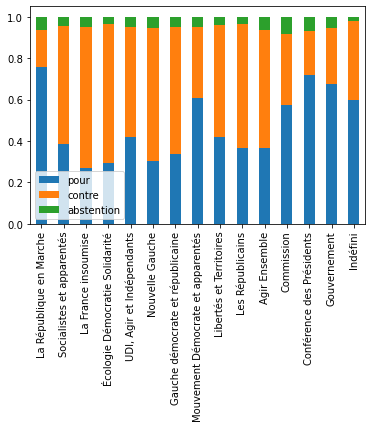

In [113]:
df_graphique.plot.bar(stacked=True)

#### Nombre de scrutin proposé par chaque demandeur :

On compte aussi le nombre de scrutins proposé par chaque coalition (on compte le nombre de fois qu'apparait chaque demandeur dans le df rassemblé par scrutin et par demandeur)

In [39]:
df_sum = df_scrutin_oneHot.drop(["date_scrutin", "titre", "votants", "pour", "contre", "non_votants",
                               "non_votants_volontaires", "abstention", "% pour", "% abstention", "adopté"], axis=1)

s = df_sum.sum(axis = 0, skipna = True)
s.sort_values(ascending = False)

Les Républicains                     737
La France insoumise                  613
Gauche démocrate et républicaine     539
Socialistes et apparentés            437
La République en Marche              321
Nouvelle Gauche                      238
UDI, Agir et Indépendants            179
Libertés et Territoires               99
Conférence des Présidents             95
Écologie Démocratie Solidarité        45
Mouvement Démocrate et apparentés     43
Gouvernement                           7
Indéfini                               6
Agir Ensemble                          5
Comission spéciale                     0
dtype: int64

On remarque que les plus "grands" groupes en terme de proposition de scrutin à l'Assemblée sont Les Républicains, La France Insoumise, La Gauche Démocrate et Républicaine, Les Socialistes et apparentés ainsi que La République En Marche.

## Statistiques votants :

In [41]:
df_votants

,idScrutin,idVotant,vote,organeRefGroupe,date_scrutin,code_type_vote,titre,demandeur,votePour,voteContre,voteAutre
0,0,PA606171,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",0.0,0.0,1.0
1,0,PA721824,Non-votant,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",0.0,0.0,1.0
2,0,PA719952,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",1.0,0.0,0.0
3,0,PA607395,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",1.0,0.0,0.0
4,0,PA718710,Pour,PO730964,2020-10-07,SPO,l'article 24 bis du projet de loi portant dive...,"Président du groupe ""La République en Marche""",1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
308924,3116,PA335612,Pour,PO730940,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",1.0,0.0,0.0
308925,3116,PA607619,Contre,PO759900,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",0.0,1.0,0.0
308926,3116,PA719608,Pour,PO723569,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",1.0,0.0,0.0
308927,3116,PA721932,Pour,PO723569,2020-10-30,SPO,l'amendement n° 1237 de la commission des fina...,"Présidente du groupe ""Socialistes et apparentés""",1.0,0.0,0.0


#### Nombre de votes par votants (pour, contre ou non-votants) :

In [57]:
df_votants

df_votants['idVotant'].value_counts()

PA606171    2161
PA719850    1638
PA719608    1638
PA720154    1352
PA721542    1306
            ... 
PA774962       5
PA719914       1
PA331481       1
PA337633       1
PA563          1
Name: idVotant, Length: 638, dtype: int64

Il ne paraît pas pertinent de prendre en compte les votants ne votants qu'une à quelques fois pour tenter de prédire l'appartenance politique de ce dernier à partir de ses votes : cela pourrait amener à des résultats aberrants ou du moins biaisés.
On peut donc, pour une partie de l'étude du moins retirer une partie des votants ayant peu voté.
On choisit de retirer ceux qui ont votés 5 fois et moins.

#### Nombre de votants dans chaque groupe politique :

In [65]:
df_votants.loc[:, ('idVotant', 'organeRefGroupe')].drop_duplicates().organeRefGroupe.value_counts()

PO730964    338
PO730934    117
PO774834     56
PO730970     52
PO723569     45
PO744425     38
PO730952     35
PO758835     35
PO730946     33
PO767217     28
PO765636     28
PO759900     23
PO771889     21
PO771923     20
PO730940     18
PO730958     17
PO771789     17
Name: organeRefGroupe, dtype: int64

Correspondance organeRefGroupe :
- PO730964 LREM
- PO730934 LR
- PO730970 MODEM
- PO744425 UDI-AGIR
- PO758835 SOC
- PO771923 Agir ens
- PO730958 FI
- PO771889 UDI-I
- PO730940 GDR
- PO759900 LT
- PO771789 EDS
- PO723569 NI

On remarque que cela correspond bien à la composition de l'Assemblée Nationale.

#### On observe le nombre de vote Pour et Contre pour chaque votants, en fonction de qui est le demandeur. (A refaire avec le One Hot Encoding)

In [91]:
df_votants_voteParDemandeur = df_votants.drop('idScrutin', axis = 1).groupby(['idVotant', 'demandeur']).sum()

In [92]:
df_votants_voteParDemandeur

votePour  \
idVotant demandeur                                                      
PA1008   Conference des Presidents                                0.0   
         Conférence des Présidents                               19.0   
         Gouvernement                                             2.0   
         President du groupe "Les Républicains"                   2.0   
         President(e) du groupe "La Republique en Marche"         1.0   
...                                                               ...   
PA998    Président du groupe "Écologie Démocratie Solida...       1.0   
         Président du groupe de la "Gauche démocrate et ...       1.0   
         Président(e) du groupe "Les Républicains"                0.0   
         Présidente du groupe "Nouvelle Gauche"                   1.0   
         Présidente du groupe "Socialistes et apparentés"         1.0   

                                                             voteContre  \
idVotant demandeur                                                        
PA1008   Conference des Presidents                                  1.0   
         Conférence des Présidents                                 27.0   
         Gouvernement                                               2.0   
         President du groupe "Les Républicains"                     0.0   
         President(e) du groupe "La Republique en Marche"           0.0   
...                                                                 ...   
PA998    Président du groupe "Écologie Démocratie Solida...         0.0   
         Président du groupe de la "Gauche démocrate et ...         1.0   
         Président(e) du groupe "Les Républicains"                  1.0   
         Présidente du groupe "Nouvelle Gauche"                     0.0   
         Présidente du groupe "Socialistes et apparentés"           2.0   

                                                             voteAutre  
idVotant demandeur                                                      
PA1008   Conference des Presidents                                 0.0  
         Conférence des Présidents                                 0.0  
         Gouvernement                                              0.0  
         President du groupe "Les Républicains"                    0.0  
         President(e) du groupe "La Republique en Marche"          0.0  
...                                                                ...  
PA998    Président du groupe "Écologie Démocratie Solida...        0.0  
         Président du groupe de la "Gauche démocrate et ...        0.0  
         Président(e) du groupe "Les Républicains"                 0.0  
         Présidente du groupe "Nouvelle Gauche"                    0.0  
         Présidente du groupe "Socialistes et apparentés"          0.0  

[34731 rows x 3 columns]

In [114]:
df_votants_voteParDemandeur

df_votants_voteParDemandeur['idVotant'].value_counts()



PA606171    140
PA719608    125
PA719850    123
PA721542    113
PA606712    107
           ... 
PA774962      2
PA719914      1
PA331481      1
PA337633      1
PA563         1
Name: idVotant, Length: 638, dtype: int64

In [94]:
df_votants_voteParDemandeur = df_votants.drop('idScrutin', axis = 1).groupby(['idVotant', 'demandeur']).sum()

df_votants_voteParDemandeur['voteTotal'] = df_votants_voteParDemandeur['votePour'] + df_votants_voteParDemandeur['voteContre'] + df_votants_voteParDemandeur['voteAutre']

df_votants_voteParDemandeur['votePour'] = np.round(df_votants_voteParDemandeur['votePour']/df_votants_voteParDemandeur['voteTotal'], 2)
df_votants_voteParDemandeur['voteContre'] = np.round(df_votants_voteParDemandeur['voteContre']/df_votants_voteParDemandeur['voteTotal'], 2)
df_votants_voteParDemandeur['voteAutre'] = np.round(df_votants_voteParDemandeur['voteAutre']/df_votants_voteParDemandeur['voteTotal'], 2)

df_votants_voteParDemandeur['idVotant'] = df_votants_voteParDemandeur.index.to_frame().idVotant
df_votants_voteParDemandeur['demandeur'] = df_votants_voteParDemandeur.index.to_frame().demandeur

df_votants_voteParDemandeur.index = range(len(df_votants_voteParDemandeur))

df_votants_voteParDemandeur

,votePour,voteContre,voteAutre,voteTotal,idVotant,demandeur
0,0.00,1.00,0.0,1.0,PA1008,Conference des Presidents
1,0.41,0.59,0.0,46.0,PA1008,Conférence des Présidents
2,0.50,0.50,0.0,4.0,PA1008,Gouvernement
3,1.00,0.00,0.0,2.0,PA1008,"President du groupe ""Les Républicains"""
4,1.00,0.00,0.0,1.0,PA1008,"President(e) du groupe ""La Republique en Marche"""
...,...,...,...,...,...,...
34726,1.00,0.00,0.0,1.0,PA998,"Président du groupe ""Écologie Démocratie Solid..."
34727,0.50,0.50,0.0,2.0,PA998,"Président du groupe de la ""Gauche démocrate et..."
34728,0.00,1.00,0.0,1.0,PA998,"Président(e) du groupe ""Les Républicains"""
34729,1.00,0.00,0.0,1.0,PA998,"Présidente du groupe ""Nouvelle Gauche"""
